In [1]:
import numpy as np
import pandas as pd

## NULL VALUES

In [2]:
d = {'A':[1,2,np.nan],'B':[5,np.nan,np.nan],'C':[1,2,3]}
d

{'A': [1, 2, nan], 'B': [5, nan, nan], 'C': [1, 2, 3]}

In [3]:
df = pd.DataFrame(d)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [4]:
df.isnull()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


In [5]:
df.isna()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False


In [6]:
df.isna().any()

A     True
B     True
C    False
dtype: bool

In [7]:
df.isna().any(axis=1)

0    False
1     True
2     True
dtype: bool

In [8]:
df[df.isna().any(axis=1)] # see rows of missing values

,A,B,C
1,2.0,NaN,2
2,NaN,NaN,3


In [9]:
df.dropna()

,A,B,C
0,1.0,5.0,1


In [10]:
df.dropna(axis=1) 

,C
0,1
1,2
2,3


In [11]:
df.dropna(thresh=2) # will only drop minimum 2 null values

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [12]:
df.fillna(value='FILL VALUE')

,A,B,C
0,1,5,1
1,2,FILL VALUE,2
2,FILL VALUE,FILL VALUE,3


In [13]:
df['A'].fillna(value=df['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

## GROUPBY RECAP

In [14]:
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
        'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
        'Sales':[200,120,340,124,243,350]}

In [15]:
df = pd.DataFrame(data)

In [16]:
df

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [17]:
df.groupby('Company')

In [18]:
df.groupby('Company').describe() 

Sales                                                        
        count   mean         std    min     25%    50%     75%    max
Company                                                              
FB        2.0  296.5   75.660426  243.0  269.75  296.5  323.25  350.0
GOOG      2.0  160.0   56.568542  120.0  140.00  160.0  180.00  200.0
MSFT      2.0  232.0  152.735065  124.0  178.00  232.0  286.00  340.0

In [19]:
df.groupby('Company').describe().transpose() 

Company              FB        GOOG        MSFT
Sales count    2.000000    2.000000    2.000000
      mean   296.500000  160.000000  232.000000
      std     75.660426   56.568542  152.735065
      min    243.000000  120.000000  124.000000
      25%    269.750000  140.000000  178.000000
      50%    296.500000  160.000000  232.000000
      75%    323.250000  180.000000  286.000000
      max    350.000000  200.000000  340.000000

In [20]:
df.groupby('Company').describe().transpose()['FB']

Sales  count      2.000000
       mean     296.500000
       std       75.660426
       min      243.000000
       25%      269.750000
       50%      296.500000
       75%      323.250000
       max      350.000000
Name: FB, dtype: float64

## MULTIINDEX/MULTICOLUMNS

In [21]:
df = pd.DataFrame(np.random.randn(5,4),['A','B','C','D','E'],['W','X','Y','Z'])
df

,W,X,Y,Z
A,0.313593,1.133362,1.082844,0.176582
B,-0.747043,-0.099497,-0.224388,-0.187052
C,-0.727842,0.308224,1.390085,-0.615877
D,1.328459,2.424489,1.516702,0.284176
E,1.569970,-0.604282,0.879796,0.537168


In [22]:
states = 'CA NY WY OR CO'.split() # splitting the whitespace
states

['CA', 'NY', 'WY', 'OR', 'CO']

In [23]:
df['States'] = states # the dimension must match
df

,W,X,Y,Z,States
A,0.313593,1.133362,1.082844,0.176582,CA
B,-0.747043,-0.099497,-0.224388,-0.187052,NY
C,-0.727842,0.308224,1.390085,-0.615877,WY
D,1.328459,2.424489,1.516702,0.284176,OR
E,1.569970,-0.604282,0.879796,0.537168,CO


In [24]:
df.set_index('States')

,W,X,Y,Z
States,,,,
CA,0.313593,1.133362,1.082844,0.176582
NY,-0.747043,-0.099497,-0.224388,-0.187052
WY,-0.727842,0.308224,1.390085,-0.615877
OR,1.328459,2.424489,1.516702,0.284176
CO,1.569970,-0.604282,0.879796,0.537168


In [25]:
# multi index
outside = ['G1','G1','G1','G2','G2','G2']
inside = [1,2,3,1,2,3]
hier_index = list(zip(outside,inside))
hier_index

[('G1', 1), ('G1', 2), ('G1', 3), ('G2', 1), ('G2', 2), ('G2', 3)]

In [26]:
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex(levels=[['G1', 'G2'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [27]:
df = pd.DataFrame(np.random.randn(6,2),hier_index,['A','B'])
df

A         B
G1 1  1.087047 -0.006995
   2  0.445529  0.195409
   3 -1.591011  1.047573
G2 1  0.148473 -0.465597
   2  0.274554  0.207467
   3  1.191760 -0.704550

In [28]:
# call from outside index
df.loc['G1']

,A,B
1,1.087047,-0.006995
2,0.445529,0.195409
3,-1.591011,1.047573


In [29]:
df.loc['G1'].loc[1] 

A    1.087047
B   -0.006995
Name: 1, dtype: float64

In [30]:
df.index.names # the indices don't have any names

FrozenList([None, None])

In [31]:
df.index.names = ['Groups','Num']

In [32]:
df

A         B
Groups Num                    
G1     1    1.087047 -0.006995
       2    0.445529  0.195409
       3   -1.591011  1.047573
G2     1    0.148473 -0.465597
       2    0.274554  0.207467
       3    1.191760 -0.704550

In [33]:
df.loc['G2'].loc[2]['B']

0.2074669965741406

In [34]:
df.loc['G2'].loc[2]['A']

0.2745539057826076

In [35]:
# cross section
df.loc['G1']

,A,B
Num,,
1,1.087047,-0.006995
2,0.445529,0.195409
3,-1.591011,1.047573


In [36]:
df.xs('G1') # can skip inside multilevel index

,A,B
Num,,
1,1.087047,-0.006995
2,0.445529,0.195409
3,-1.591011,1.047573


In [37]:
df.xs(1,level='Num')

,A,B
Groups,,
G1,1.087047,-0.006995
G2,0.148473,-0.465597


## MERGE JOIN CONCATENATE

In [38]:
df1 = pd.DataFrame({'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']},
                    index=[0,1,2,3])

In [39]:
df2 = pd.DataFrame({'A':['A4','A5','A6','A7'],
                    'B':['B4','B5','B6','B7'],
                    'C':['C4','C5','C6','C7'],
                    'D':['D4','D5','D6','D7']},
                    index=[4,5,6,7])

In [40]:
df3 = pd.DataFrame({'A':['A8','A9','A10','A11'],
                    'B':['B8','B9','B10','B11'],
                    'C':['C8','C9','C10','C11'],
                    'D':['D8','D9','D10','D11']},
                    index=[8,9,10,11])

In [41]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [42]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [43]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [44]:
pd.concat([df1,df2,df3]) 

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [45]:
pd.concat([df1,df2,df3],axis=1) 

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [46]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                     'A':['A0','A1','A2','A3'],
                     'B':['B0','B1','B2','B3']})

right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                      'C':['C0','C1','C2','C3'],
                      'D':['D0','D1','D2','D3']})

In [47]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [48]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [49]:
# merging 
# join on the column, similar to SQL (primary key/foreign key)
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [50]:
# joining
# join on the index not column
left = pd.DataFrame({'A':['A0','A1','A2'],
                     'B':['B0','B1','B2']},
                     index=['K0','K1','K2'])
right = pd.DataFrame({'C':['C0','C2','C3'],
                      'D':['D0','D2','D3']},
                      index=['K0','K2','K3'])

## OPERATIONS

In [51]:
df = pd.DataFrame({'col1':[1,2,3,4],
                   'col2':[444,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [52]:
# finding unique value 
df['col2'].unique() # will return numpy array

array([444, 555, 666])

In [53]:
len(df['col2'].unique())

3

In [54]:
df['col2'].nunique()

3

In [55]:
# apply method
def times2(x):
    return x * 2

In [56]:
df['col1'].sum() # built-in function

10

In [57]:
df['col1'].apply(times2) # apply custom function

0    2
1    4
2    6
3    8
Name: col1, dtype: int64

In [58]:
df['col3'].apply(len) # apply len to each of strings

0    3
1    3
2    3
3    3
Name: col3, dtype: int64

In [59]:
df['col2'].apply(lambda x: x * 2) # apply lambda function

0     888
1    1110
2    1332
3     888
Name: col2, dtype: int64

In [60]:
# removing columns
df.drop('col1',axis=1)

,col2,col3
0,444,abc
1,555,def
2,666,ghi
3,444,xyz


In [61]:
# renaming columns
df.columns

Index(['col1', 'col2', 'col3'], dtype='object')

In [62]:
df.columns = ['col_1','col_2','col_3']
df

,col_1,col_2,col_3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [63]:
df.rename(columns={'col_1':'COL1','col_3':'COL3'},inplace=True)
df

,COL1,col_2,COL3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


## PANDAS MORE INPUT OUTPUT

In [64]:
# excel
# pip install xlrd
pd.read_excel('Excel_Sample.xlsx',sheet_name='Sheet1')

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [65]:
# pip install openpyxl
df.to_excel('Excel_Sample2.xlsx',sheet_name='NewSheet')

In [66]:
# html 
# pandas webscraping tool
data = pd.read_html('https://www.fdic.gov/bank/individual/failed/banklist.html')

In [67]:
type(data) # html table element

list

In [68]:
data[0]

,Bank Name,City,ST,CERT,Acquiring Institution,Closing Date,Updated Date
0,Washington Federal Bank for Savings,Chicago,IL,30570,Royal Savings Bank,"December 15, 2017","February 1, 2019"
1,The Farmers and Merchants State Bank of Argonia,Argonia,KS,17719,Conway Bank,"October 13, 2017","February 21, 2018"
2,Fayette County Bank,Saint Elmo,IL,1802,"United Fidelity Bank, fsb","May 26, 2017","January 29, 2019"
3,"Guaranty Bank, (d/b/a BestBank in Georgia & Mi...",Milwaukee,WI,30003,First-Citizens Bank & Trust Company,"May 5, 2017","March 22, 2018"
4,First NBC Bank,New Orleans,LA,58302,Whitney Bank,"April 28, 2017","January 29, 2019"
5,Proficio Bank,Cottonwood Heights,UT,35495,Cache Valley Bank,"March 3, 2017","January 29, 2019"
6,Seaway Bank and Trust Company,Chicago,IL,19328,State Bank of Texas,"January 27, 2017","January 29, 2019"
7,Harvest Community Bank,Pennsville,NJ,34951,First-Citizens Bank & Trust Company,"January 13, 2017","May 18, 2017"
8,Allied Bank,Mulberry,AR,91,Today's Bank,"September 23, 2016","January 29, 2019"
9,The Woodbury Banking Company,Woodbury,GA,11297,United Bank,"August 19, 2016","December 13, 2018"


In [69]:
# sql
# pip install sqlalchemy
# for PostgreSQL: sudo apt-get install libpq-dev, check with pg_config --version, pip install psycopg2
from sqlalchemy import create_engine

In [70]:
engine = create_engine('sqlite:///:memory:') # temporary build sql engine in memory

In [71]:
df.to_sql('my_table',engine)

In [72]:
sqldf = pd.read_sql('my_table',con=engine)

In [73]:
sqldf

,index,COL1,col_2,COL3
0,0,1,444,abc
1,1,2,555,def
2,2,3,666,ghi
3,3,4,444,xyz


In [74]:
sqldf = pd.read_sql('my_table',con=engine,index_col=['index'])

In [75]:
sqldf

,COL1,col_2,COL3
index,,,
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


## VISUALIZATION

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
data1 = np.random.normal(0, 0.1, 1000)
data2 = np.random.normal(1, 0.4, 1000) + np.linspace(0, 1, 1000)
data3 = 2 + np.random.random(1000) * np.linspace(1, 5, 1000)
data4 = np.random.normal(3, 0.2, 1000) + 0.3 * np.sin(np.linspace(0, 20, 1000))

In [78]:
data1

array([ 1.01011586e-01,  1.19513966e-02,  6.64033899e-02, -5.02054461e-03,
       -1.32036290e-01, -5.50557031e-02, -1.02206725e-01,  2.91996763e-02,
       -5.62332588e-02,  1.86258498e-01, -4.54878235e-02,  4.83390561e-02,
       -4.86429384e-02,  2.42447819e-02,  4.99203677e-02,  1.18572897e-01,
       -9.53242972e-02,  3.35930318e-02,  5.43050538e-02, -1.15531845e-01,
        2.36355207e-04,  2.98633210e-02,  1.57734961e-01, -1.26714923e-01,
        1.48462988e-01, -1.62128396e-05,  1.36174220e-01,  8.91463944e-02,
       -7.59325811e-02,  1.26169493e-01,  2.56835668e-02, -8.75097114e-02,
        6.86813026e-03, -6.09088048e-02,  1.68968489e-01, -9.72013680e-03,
        4.89328618e-02, -8.42218277e-02, -1.05032560e-01, -8.46055122e-02,
        3.70619269e-02,  1.48337891e-01, -1.71936811e-01, -1.56442299e-01,
        9.09772587e-02, -7.41436325e-02,  1.04891739e-01,  9.88054327e-02,
       -2.23339597e-02, -2.07606764e-02, -6.35492503e-02, -3.30588562e-02,
        3.43864281e-02, -

In [79]:
data1.shape

(1000,)

In [80]:
data = np.vstack([data1, data2, data3, data4]).transpose()
data

array([[ 0.10101159,  0.51135401,  2.18163723,  2.63950398],
       [ 0.0119514 ,  2.05305317,  2.68954109,  3.14884967],
       [ 0.06640339,  1.49922359,  2.89846226,  3.11669734],
       ...,
       [ 0.02252843,  2.11629326,  2.4877575 ,  3.12323148],
       [-0.21691568,  1.11492718,  2.36431825,  2.97996571],
       [-0.08045342,  1.88344371,  3.69897497,  3.23692287]])

In [81]:
data.shape

(1000, 4)

In [82]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'data3', 'data4'])
df.head()

,data1,data2,data3,data4
0,0.101012,0.511354,2.181637,2.639504
1,0.011951,2.053053,2.689541,3.148850
2,0.066403,1.499224,2.898462,3.116697
3,-0.005021,0.967905,2.834749,2.916725
4,-0.132036,1.052702,2.356694,3.249531


__Line Plot__

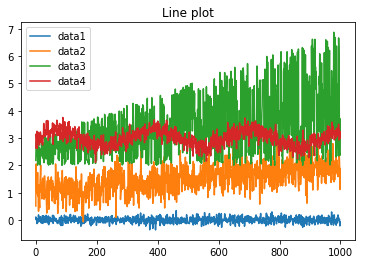

In [83]:
df.plot(title='Line plot')

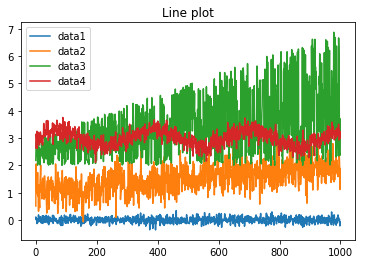

In [84]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4'])

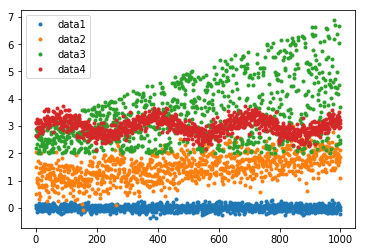

In [85]:
df.plot(style='.')

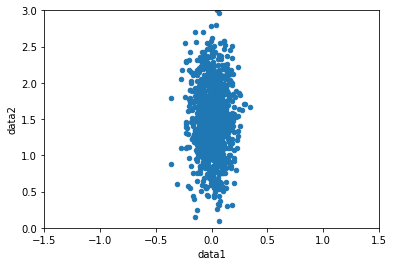

In [86]:
_ = df.plot(kind='scatter', x='data1', y='data2',
            xlim=(-1.5, 1.5), ylim=(0, 3))

__Histogram__

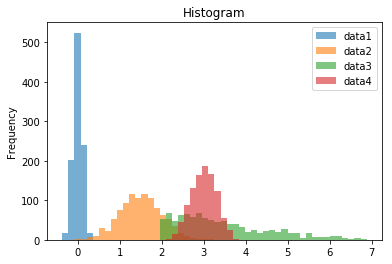

In [87]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6)
plt.axvline(df[])

__Cumulative Distribution__

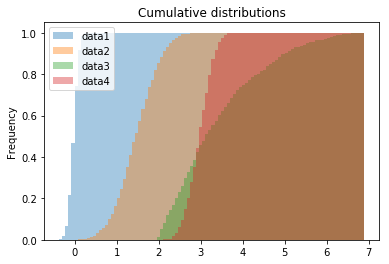

In [88]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        density=True,
        cumulative=True,
        alpha=0.4)

__Box Plot__

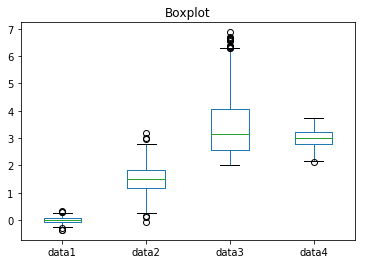

In [89]:
df.plot(kind='box',
        title='Boxplot')

__Subplots__

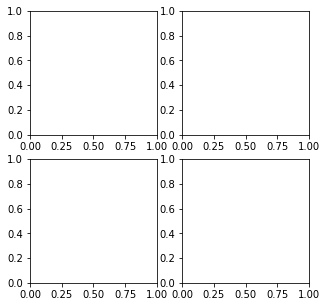

In [90]:
fig, ax = plt.subplots(2, 2, figsize=(5, 5))

# df.plot(ax=ax[0][0],
#         title='Line plot')

# df.plot(ax=ax[0][1],
#         style='o',
#         title='Scatter plot')

# df.plot(ax=ax[1][0],
#         kind='hist',
#         bins=50,
#         title='Histogram')

# df.plot(ax=ax[1][1],
#         kind='box',
#         title='Boxplot')

# plt.tight_layout()

__Pie Charts__

In [91]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

False    824
True     176
Name: data1, dtype: int64

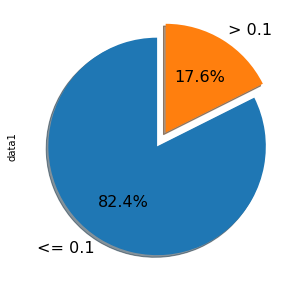

In [92]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16)

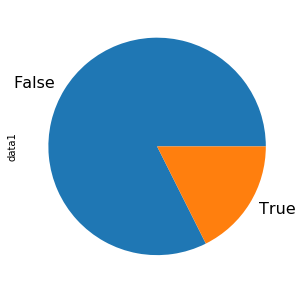

In [93]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
#                explode=[0, 0.15],
#                labels=['<= 0.1', '> 0.1'],
#                autopct='%1.1f%%',
#                shadow=True,
#                startangle=90,
               fontsize=16)

__Hexbin__

In [94]:
data = np.vstack([np.random.normal((0, 0), 2, size=(1000, 2)),
                  np.random.normal((9, 9), 3, size=(2000, 2))])
df = pd.DataFrame(data, columns=['x', 'y'])
df

,x,y
0,-3.897716,-1.637067
1,2.715240,3.818716
2,1.622608,1.507109
3,2.481536,0.636727
4,-1.606961,1.801870
5,-1.960962,-3.436413
6,-1.795157,-3.538269
7,-1.746156,1.613672
8,2.527688,1.211976
9,3.957914,1.091507


In [95]:
df.shape

(3000, 2)

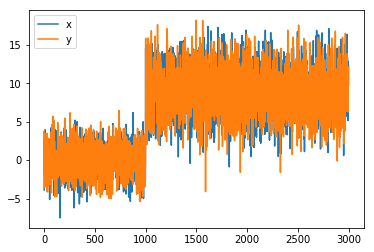

In [96]:
df.plot()

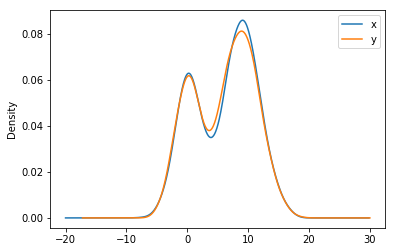

In [97]:
df.plot(kind='kde')

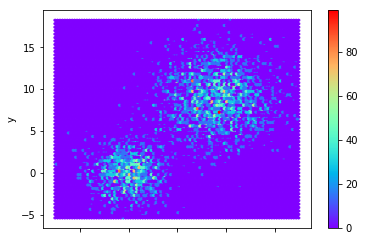

In [98]:
df.plot(kind='hexbin', x='x', y='y', bins=100, cmap='rainbow')

__Pandas Profiling__

In [99]:
df = pd.read_csv('cereal.csv')

In [100]:
import pandas_profiling
pandas_profiling.ProfileReport(df)

Number of variables,16
Number of observations,77
Total Missing (%),0.2%
Total size in memory,9.7 KiB
Average record size in memory,129.0 B
Numeric,11
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,1
